In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import mlab
import scipy.signal as signal
# import xarray as xr
from scipy import stats
import pandas as pd
from scipy import linalg
import os

%matplotlib inline 
from matplotlib import pyplot as plt
import matplotlib.cm as cm 
from math import pi 
!pip install windrose openpyxl
from windrose import WindroseAxes

In [2]:
#streamlining spectral comparisons script using loops

In [3]:
import xarray as xr
import pandas as pd

# Define local dataset files
local_datasets = {
    2010: 'moss_landing_2010.nc',
    2011: 'moss_landing_2011.nc',
    2012: 'moss_landing_2012.nc',
    2013: 'moss_landing_2013.nc',
    2014: 'moss_landing_2014.nc',
    2015: 'moss_landing_2015.nc',
    2016: 'moss_landing_2016.nc',
    2017: 'moss_landing_2017.nc',
    2018: 'moss_landing_2018.nc',
    2019: 'moss_landing_2019.nc',
    2021: 'moss_landing_2021.nc'
}

# Read and process datasets
dfs = {}
for year, dataset_file in local_datasets.items():
    ds = xr.open_dataset(dataset_file)
    df = ds.to_dataframe().reset_index()  # Reset index here
    if 'temp_flg' in df.columns:
        df_flagged = df[df['temp_flg'] == 1]
        dfs[year] = pd.DataFrame(df_flagged['temp'], columns=['temp'])
    else:
        dfs[year] = pd.DataFrame(df['temp'], columns=['temp'])

# Accessing data for a specific year
spectral_dfs = {year: df for year, df in dfs.items()}



In [4]:
# spectral_dfs

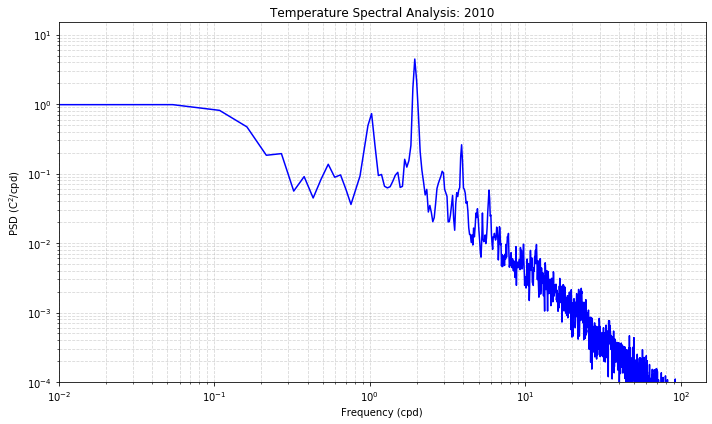

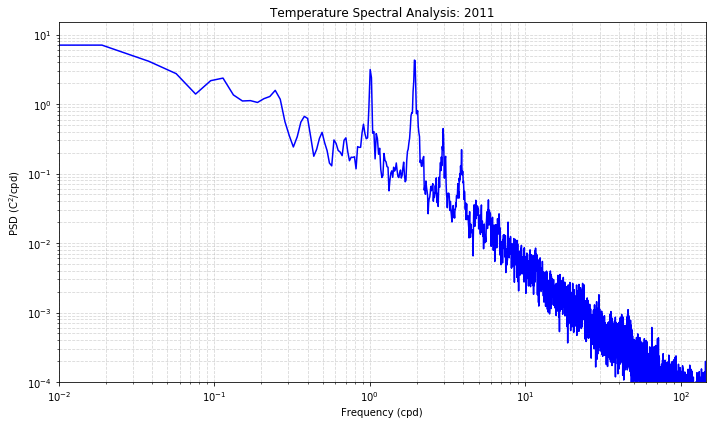

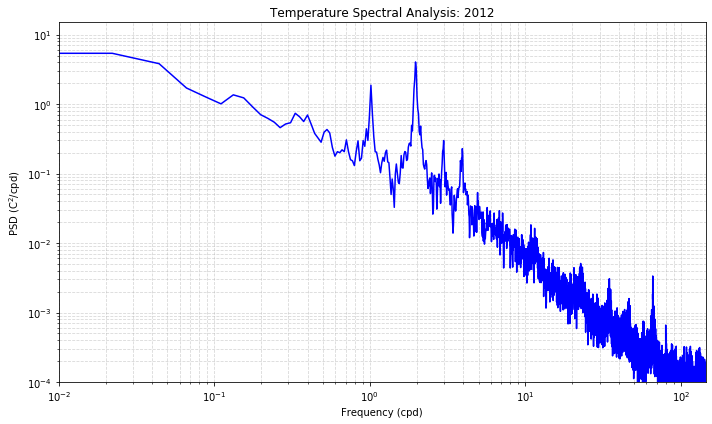

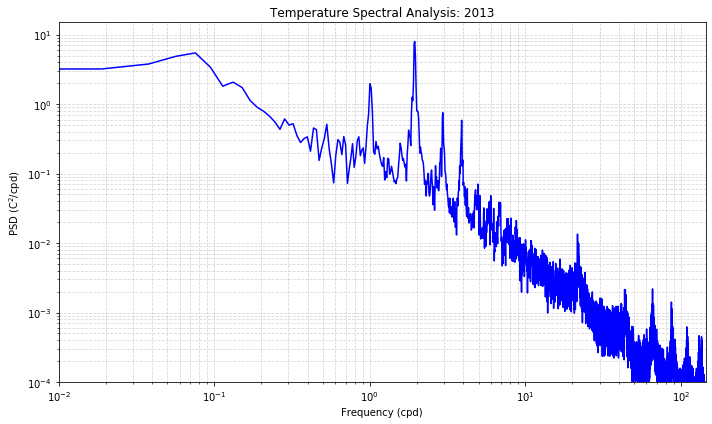

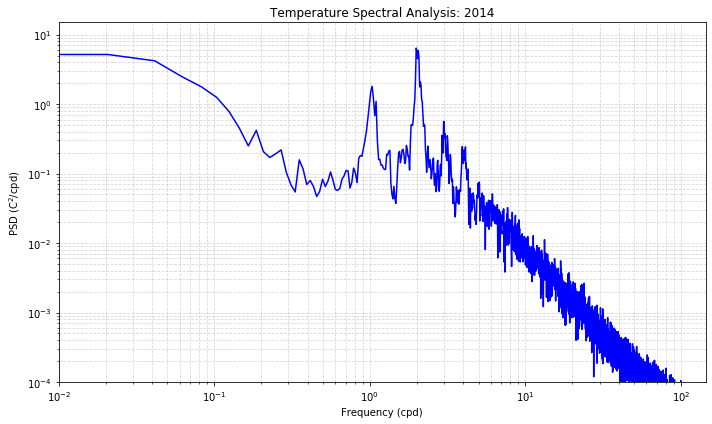

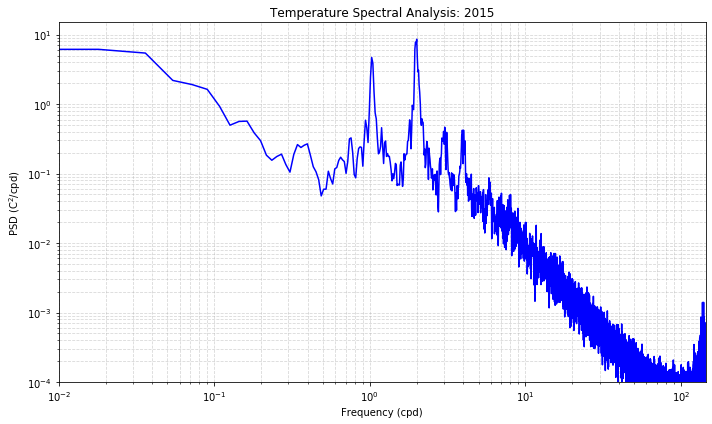

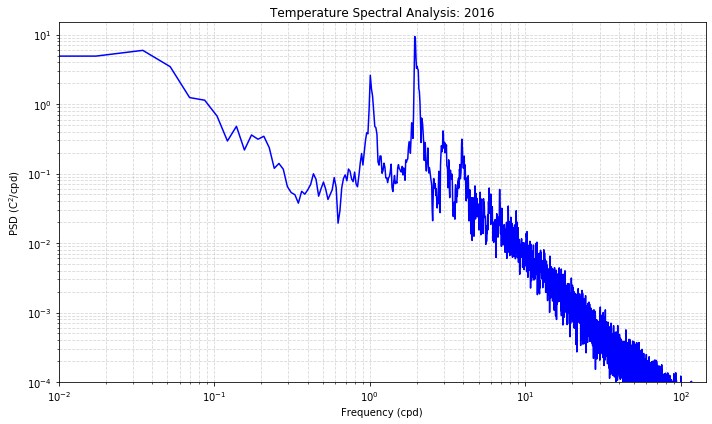

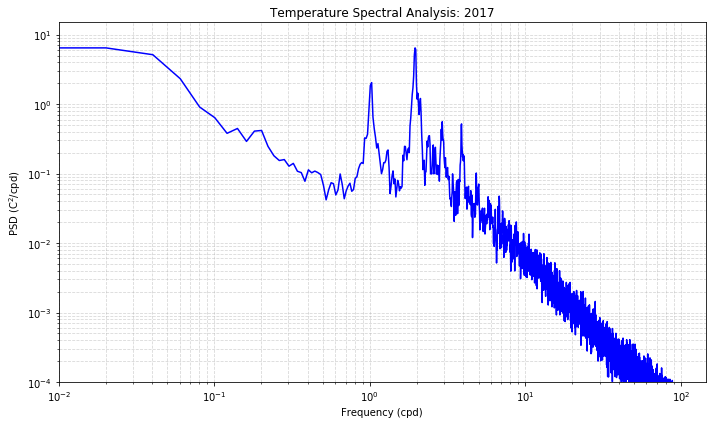

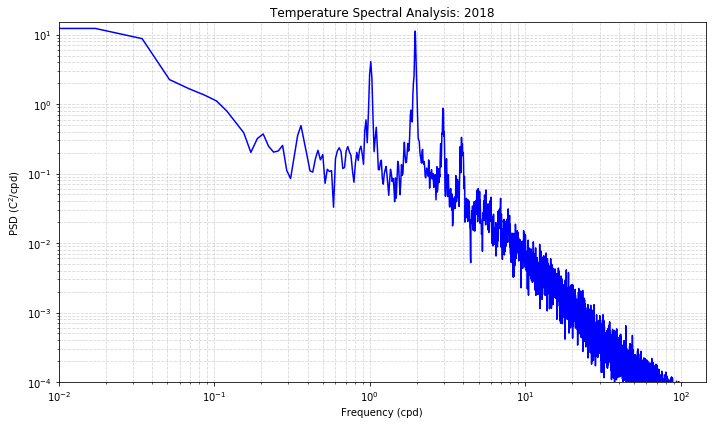

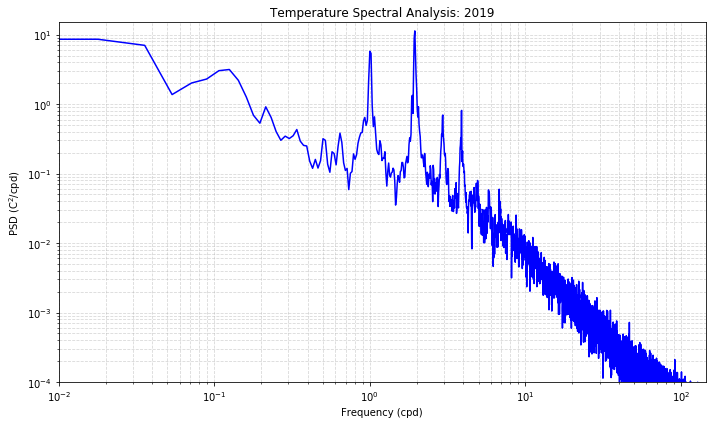

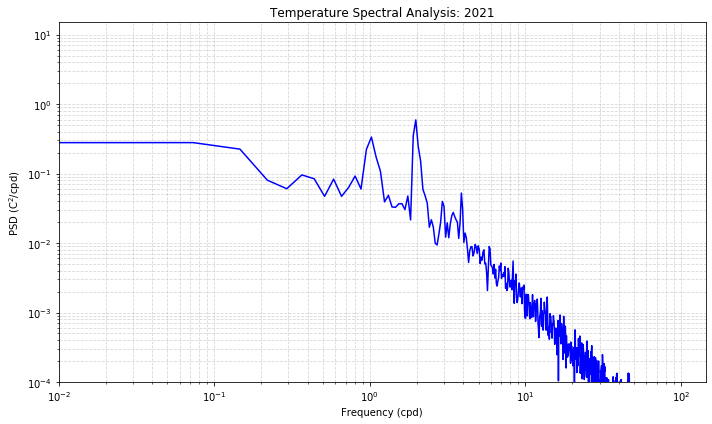

In [5]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch

# Define local dataset files
local_datasets = {
    2010: 'moss_landing_2010.nc',
    2011: 'moss_landing_2011.nc',
    2012: 'moss_landing_2012.nc',
    2013: 'moss_landing_2013.nc',
    2014: 'moss_landing_2014.nc',
    2015: 'moss_landing_2015.nc',
    2016: 'moss_landing_2016.nc',
    2017: 'moss_landing_2017.nc',
    2018: 'moss_landing_2018.nc',
    2019: 'moss_landing_2019.nc',
    2021: 'moss_landing_2021.nc'
}

# Read and process datasets
for year, dataset_file in local_datasets.items():
    ds = xr.open_dataset(dataset_file)
    df = ds.to_dataframe().reset_index()  # Reset index here
    if 'temp_flg' in df.columns:
        df_flagged = df[df['temp_flg'] == 1]
        spectral_df = pd.DataFrame(df_flagged['temp'], columns=['temp'])
    else:
        spectral_df = pd.DataFrame(df['temp'], columns=['temp'])

    N = len(spectral_df)
    winlen = N / 6
    fs = 288
    fN = 0.5 * fs
    f, S = welch(spectral_df['temp'], fs=fs, nperseg=winlen, window='hanning', detrend='linear')
    
    plt.figure(figsize=(10, 6))
    plt.loglog(f, S, color='blue')  # color :) 
    plt.title(f'Temperature Spectral Analysis: {year}')
    plt.xlabel('Frequency (cpd)')
    plt.ylabel('PSD (C$^{2}$/cpd)')
    plt.ylim(0.0001, 15)  # Adjust y-axis 
    plt.xlim(0.01, fN)
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

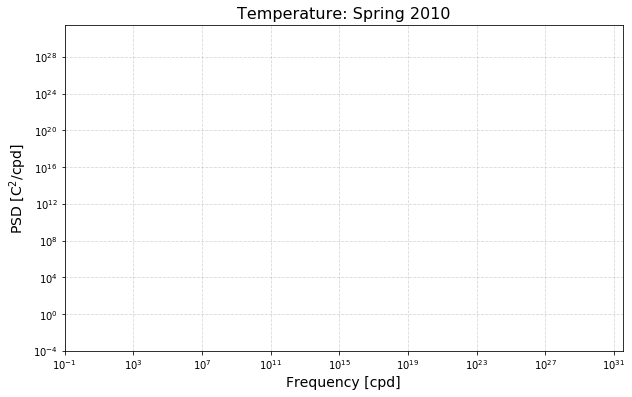

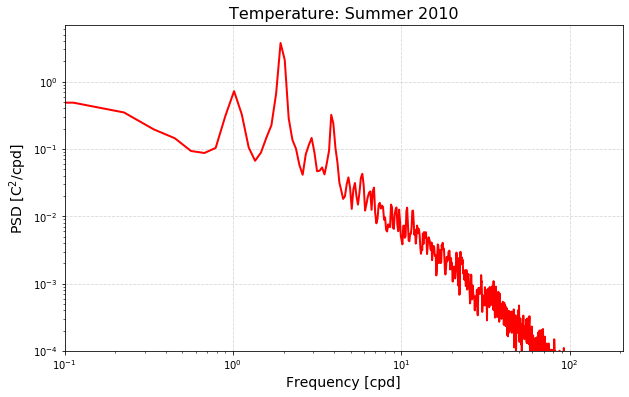

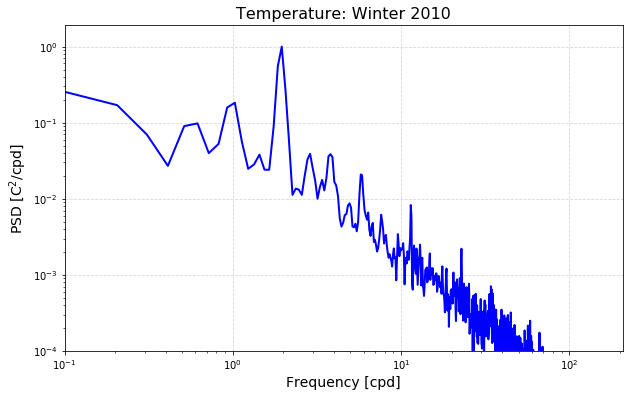

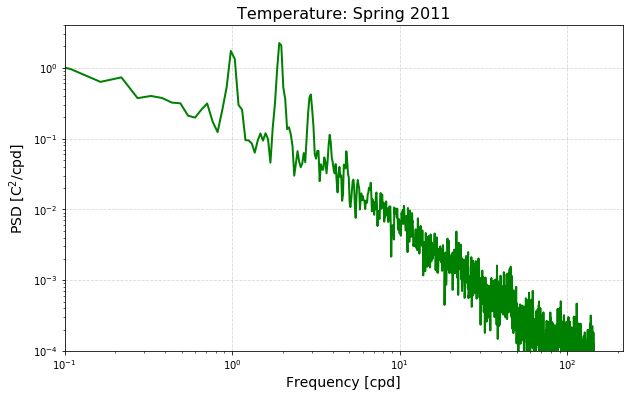

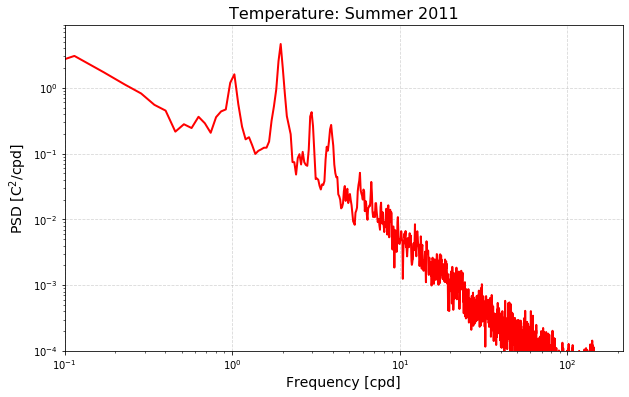

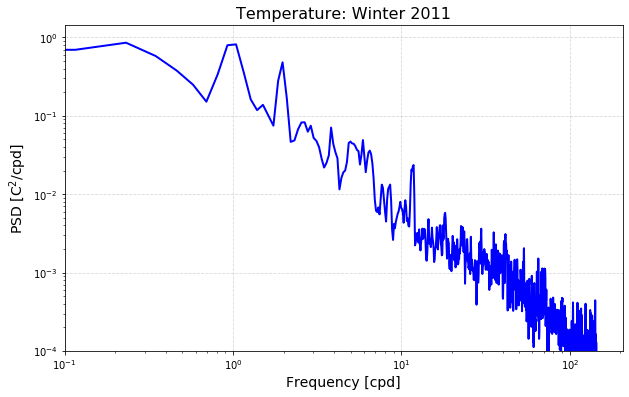

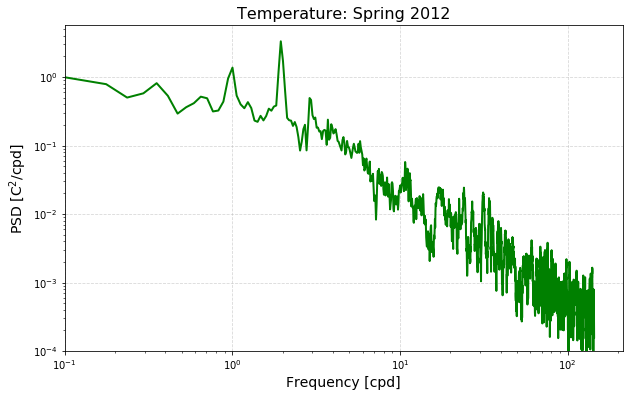

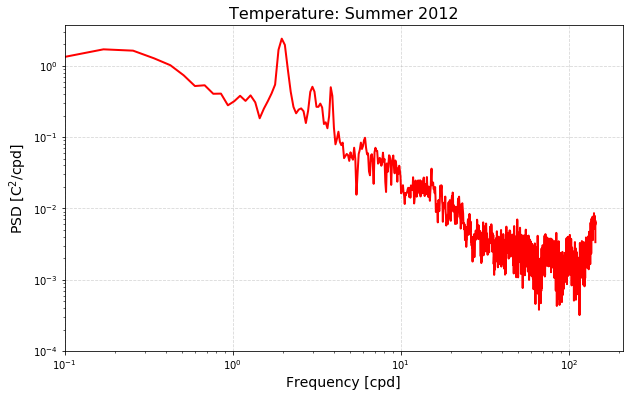

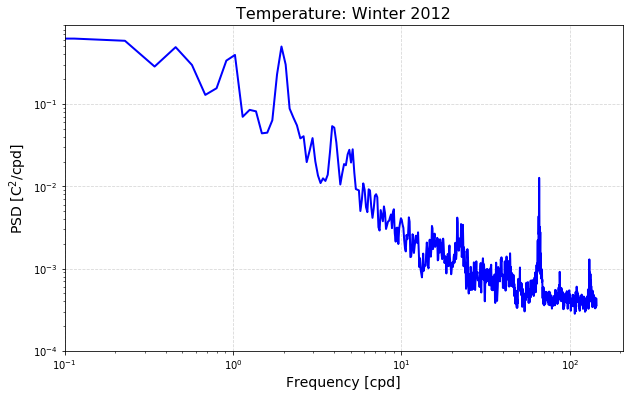

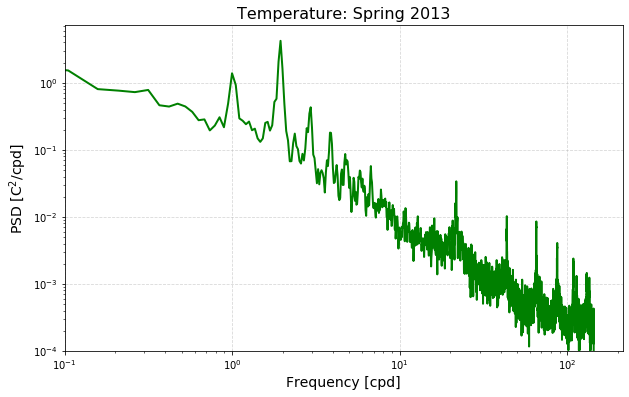

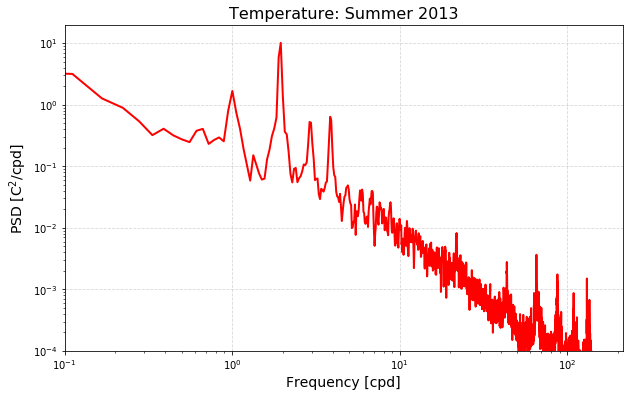

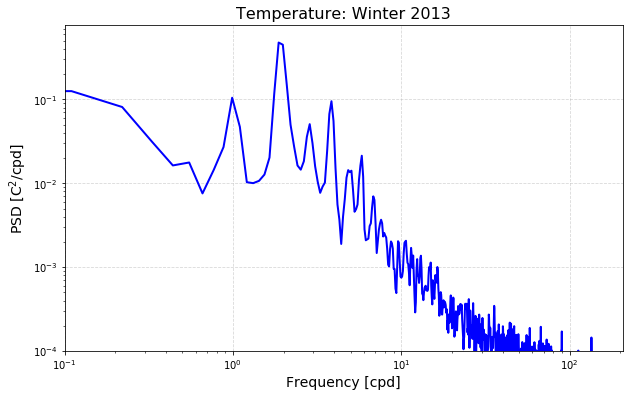

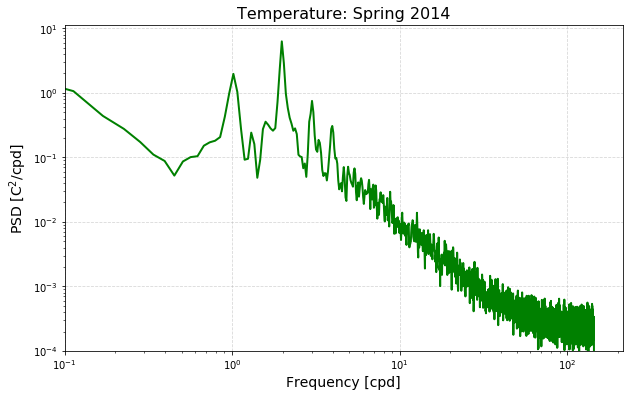

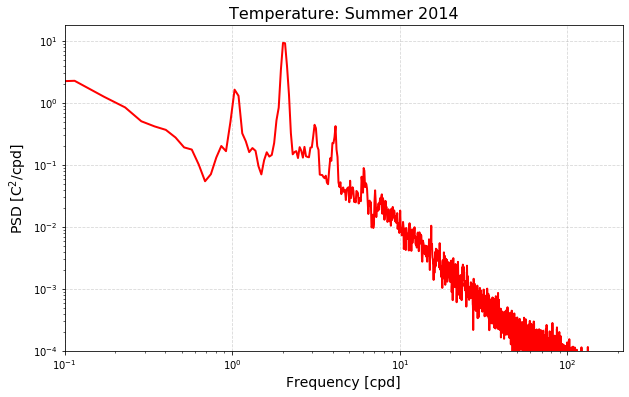

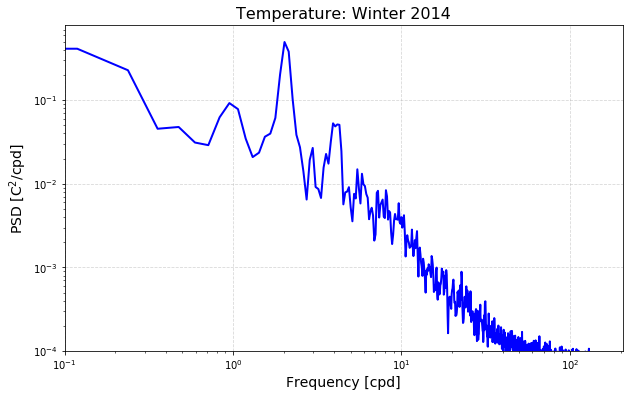

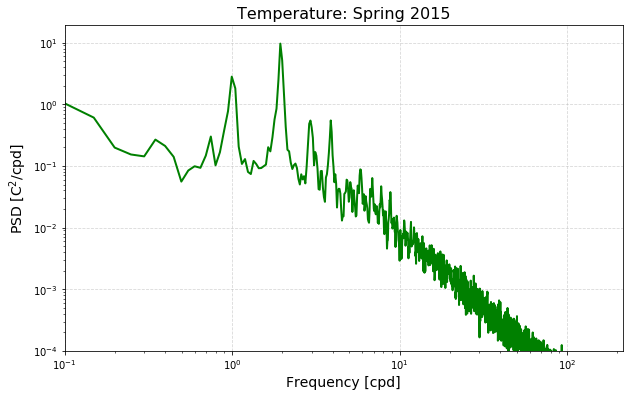

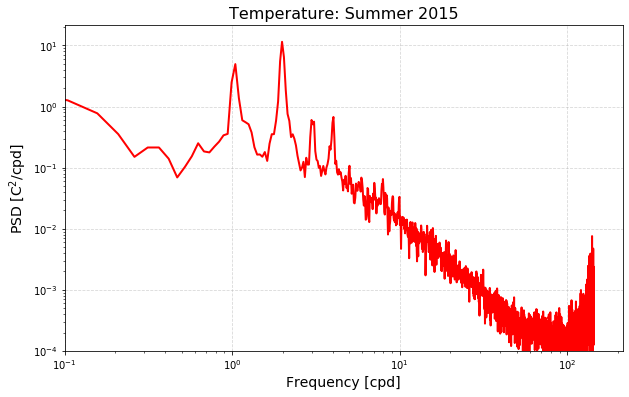

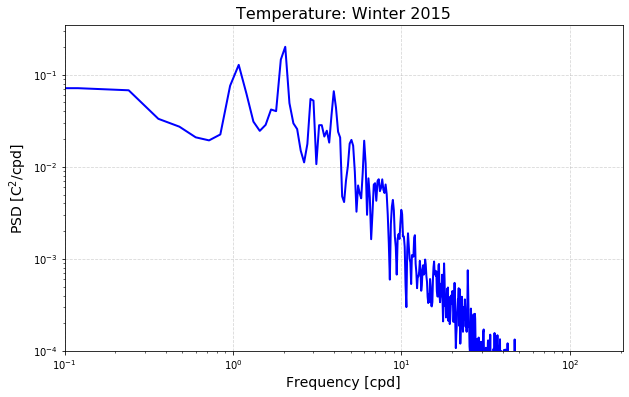

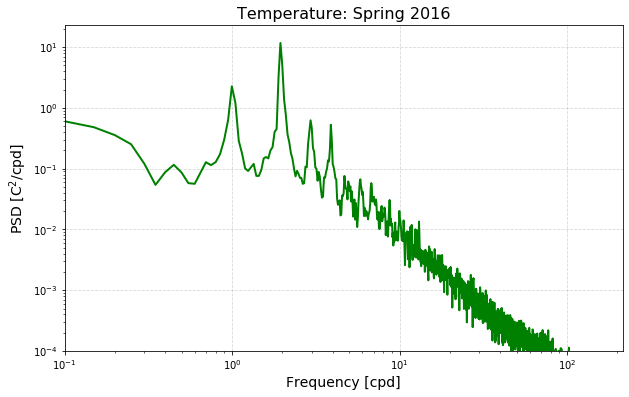

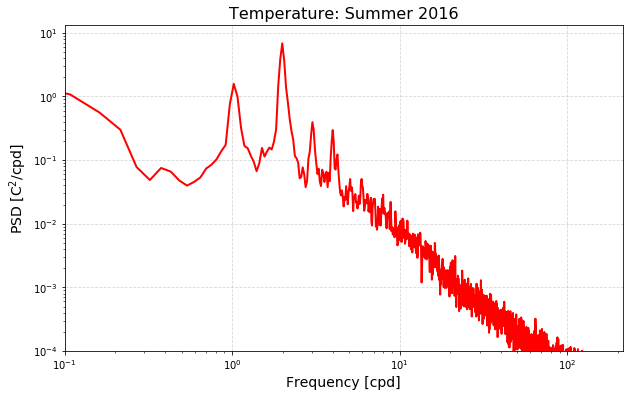

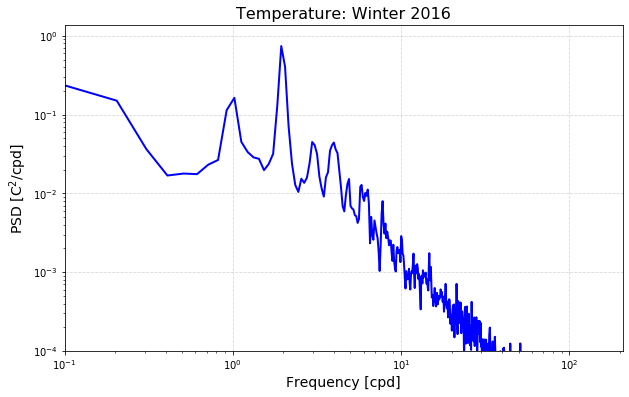

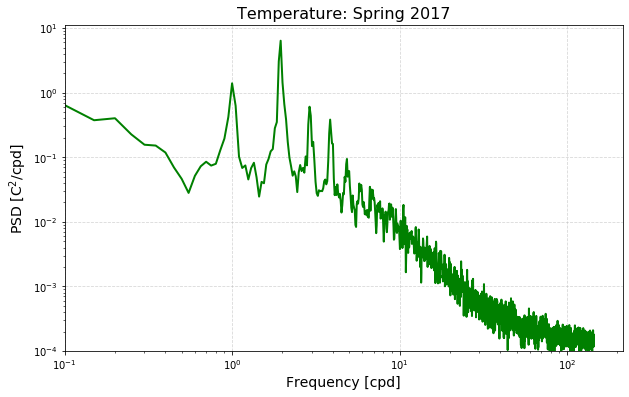

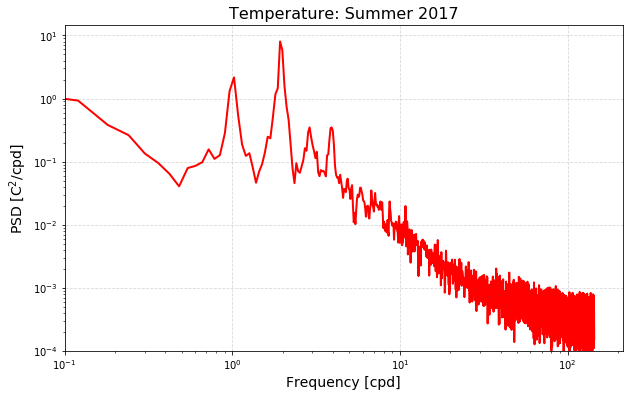

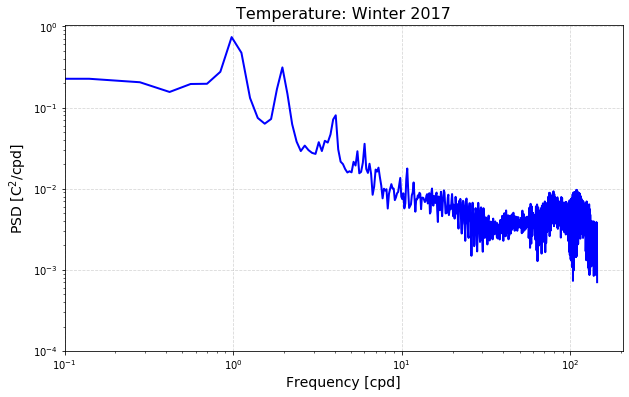

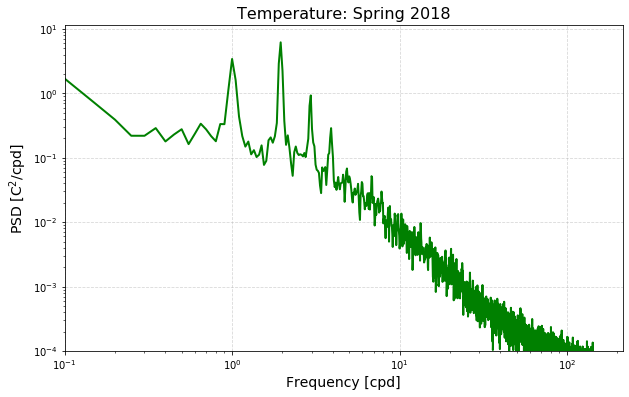

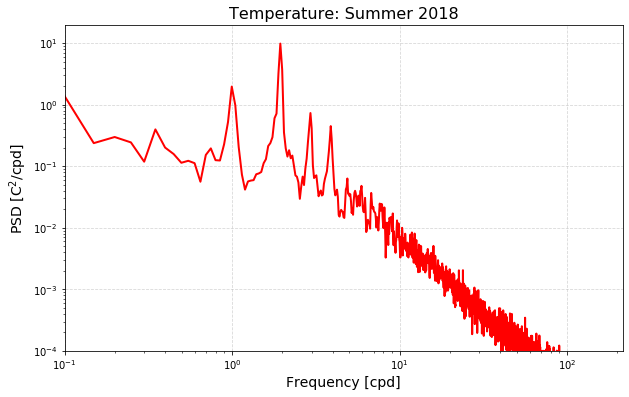

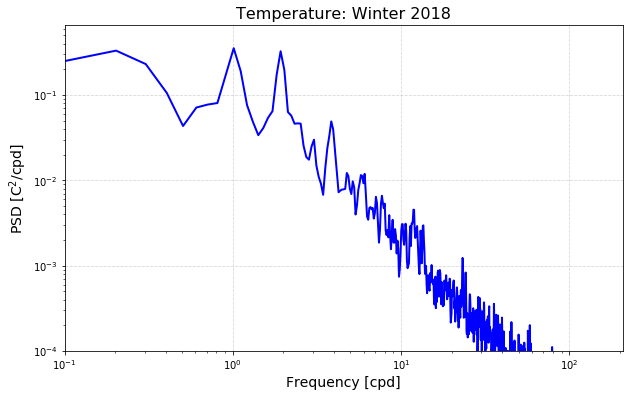

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from scipy.signal import welch

# Define the local dataset files for each year
local_datasets = {
    2010: 'moss_landing_2010.nc',
    2011: 'moss_landing_2011.nc',
    2012: 'moss_landing_2012.nc',
    2013: 'moss_landing_2013.nc',
    2014: 'moss_landing_2014.nc',
    2015: 'moss_landing_2015.nc',
    2016: 'moss_landing_2016.nc',
    2017: 'moss_landing_2017.nc',
    2018: 'moss_landing_2018.nc'
}

# Define the date ranges for each season
seasons = {
    'Spring': ('03-01', '06-30'),
    'Summer': ('07-01', '10-31'),
    'Winter': ('11-01', '02-28')
}

# Define colors for each season
season_colors = {
    'Spring': 'green',
    'Summer': 'red',
    'Winter': 'blue'
}

# Loop through each year
for year, dataset_file in local_datasets.items():
    # Load the dataset using xarray
    ds = xr.open_dataset(dataset_file)
    
    # Perform spectral analysis for each season
    for season, (start_date, end_date) in seasons.items():
        start_date = f"{year}-{start_date}"
        end_date = f"{year if season != 'Winter' else year + 1}-{end_date}"  # Adjust end date for winter
        
        # Extract temperature data for the current season
        seasonal_data = ds['temp'].sel(time=slice(start_date, end_date))
        
        # Convert to pandas DataFrame for easier manipulation
        seasonal_data_df = seasonal_data.to_dataframe()
        
        # Clean the data by removing NaNs and infs
        seasonal_data_df.dropna(inplace=True)
        seasonal_data_df.replace([np.inf, -np.inf], np.nan, inplace=True)
        seasonal_data_df.dropna(inplace=True)
        
        # Apply spectral analysis
        N = len(seasonal_data_df)
        winlen = N / 6
        f, S = welch(seasonal_data_df['temp'], fs=288, nperseg=winlen, window='hanning', detrend='linear')
        
        # Plot the results with aesthetic improvements
        plt.figure(figsize=(10, 6))  # Larger figure size
        plt.loglog(f, S, color=season_colors[season], linewidth=2)  # Use different colors for each season
        plt.title(f'Temperature: {season} {year}', fontsize=16)  # Larger title font size
        plt.xlabel('Frequency [cpd]', fontsize=14)  # Larger x-axis label font size
        plt.ylabel('PSD [C$^{2}$/cpd]', fontsize=14)  # Larger y-axis label font size
        plt.ylim(0.0001)
        plt.xlim(0.1)
        plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines with dashed style and transparency
        plt.show()  # Show plot for each season


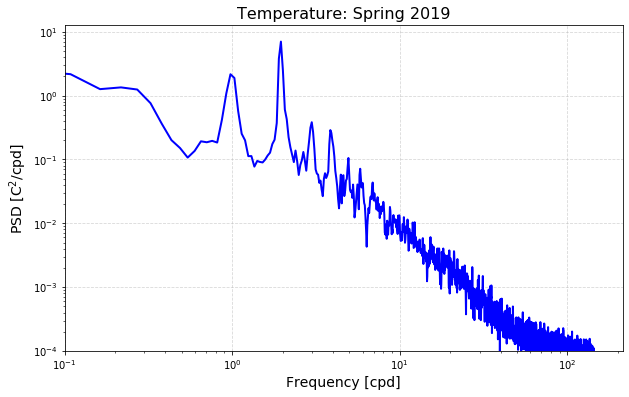

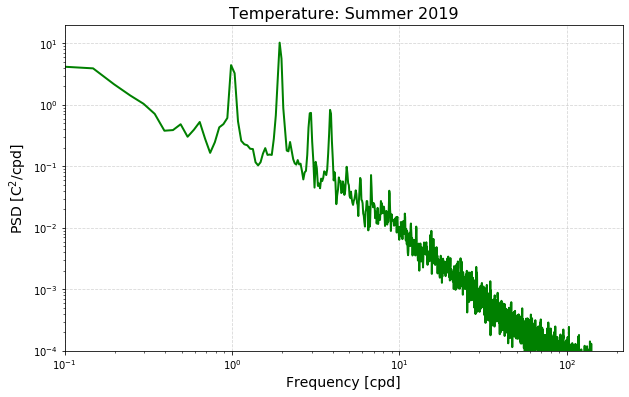

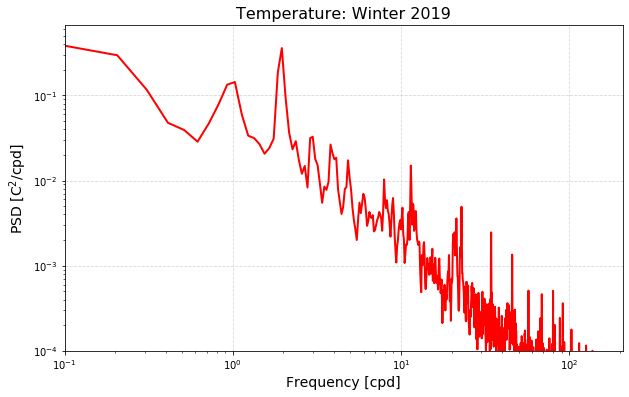

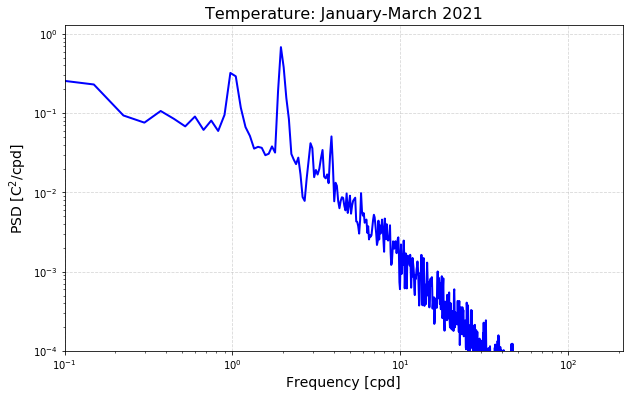

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from scipy.signal import welch

# Define the local dataset files for each year
local_datasets = {
    2019: 'moss_landing_2019.nc',
    2021: 'moss_landing_2021.nc'
}

# Define the date ranges for each season
seasons = {
    'Spring': ('03-01', '06-30'),
    'Summer': ('07-01', '10-31'),
    'Winter': ('11-01', '12-31')
}

# Define aesthetic parameters
colors = ['blue', 'green', 'red']
linestyles = ['-', '-', '-']

# Loop through each year
for year, dataset_file in local_datasets.items():
    # Load the dataset using xarray
    ds = xr.open_dataset(dataset_file)
    
    # Perform spectral analysis for January-March for 2021
    if year == 2021:
        start_date = '2021-01-01'
        end_date = '2021-03-31'
        
        # Extract temperature data for the specified period
        seasonal_data = ds['temp'].sel(time=slice(start_date, end_date))
        
        # Convert to pandas DataFrame for easier manipulation
        seasonal_data_df = seasonal_data.to_dataframe()
        
        # Clean the data by removing NaNs and infs
        seasonal_data_df.dropna(inplace=True)
        seasonal_data_df.replace([np.inf, -np.inf], np.nan, inplace=True)
        seasonal_data_df.dropna(inplace=True)
        
        # Apply spectral analysis
        N = len(seasonal_data_df)
        winlen = N / 6
        f, S = welch(seasonal_data_df['temp'], fs=288, nperseg=winlen, window='hanning', detrend='linear')
        
        # Plot the results with aesthetic improvements
        plt.figure(figsize=(10, 6))  # Larger figure size
        plt.loglog(f, S, color='blue', linewidth=2, linestyle='-')  # Blue line with increased linewidth
        plt.title(f'Temperature: January-March {year}', fontsize=16)  # Larger title font size
        plt.xlabel('Frequency [cpd]', fontsize=14)  # Larger x-axis label font size
        plt.ylabel('PSD [C$^{2}$/cpd]', fontsize=14)  # Larger y-axis label font size
        plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines with dashed style and transparency
        plt.ylim(0.0001)
        plt.xlim(0.1)
        plt.show()  # Show plot for January-March of 2021
        
    else:
        # Perform spectral analysis for the other seasons
        for i, (season, (start_date, end_date)) in enumerate(seasons.items()):
            start_date = f"{year}-{start_date}"
            end_date = f"{year}-{end_date}"
            
            # Extract temperature data for the current season
            seasonal_data = ds['temp'].sel(time=slice(start_date, end_date))
            
            # Convert to pandas DataFrame for easier manipulation
            seasonal_data_df = seasonal_data.to_dataframe()
            
            # Clean the data by removing NaNs and infs
            seasonal_data_df.dropna(inplace=True)
            seasonal_data_df.replace([np.inf, -np.inf], np.nan, inplace=True)
            seasonal_data_df.dropna(inplace=True)
            
            # Apply spectral analysis
            N = len(seasonal_data_df)
            winlen = N / 6
            f, S = welch(seasonal_data_df['temp'], fs=288, nperseg=winlen, window='hanning', detrend='linear')
            
            # Plot the results with aesthetic improvements
            plt.figure(figsize=(10, 6))  # Larger figure size
            plt.loglog(f, S, color=colors[i], linewidth=2, linestyle=linestyles[i])  # Adjust color and linestyle
            plt.title(f'Temperature: {season} {year}', fontsize=16)  # Larger title font size
            plt.xlabel('Frequency [cpd]', fontsize=14)  # Larger x-axis label font size
            plt.ylabel('PSD [C$^{2}$/cpd]', fontsize=14)  # Larger y-axis label font size
            plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines with dashed style and transparency
            plt.ylim(0.0001)
            plt.xlim(0.1)
            plt.show()  # Show plot for each season

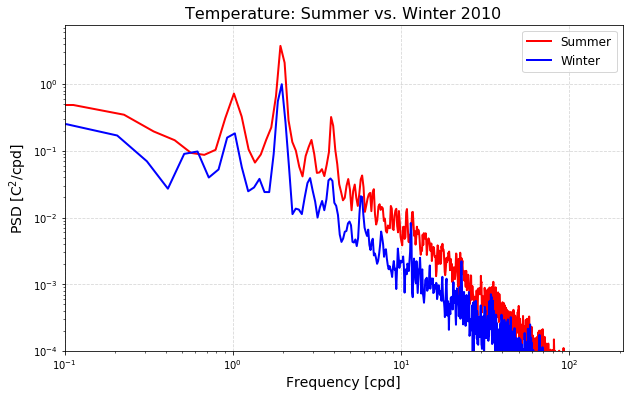

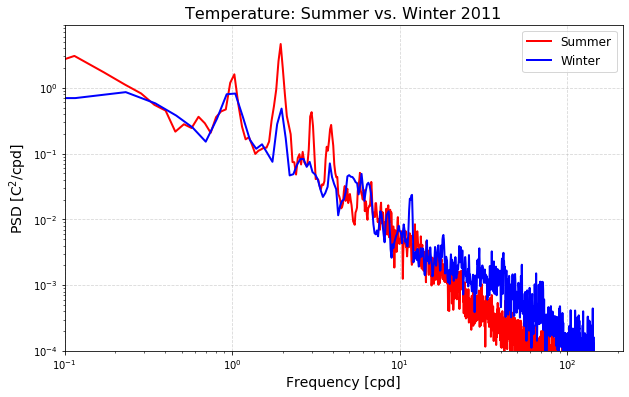

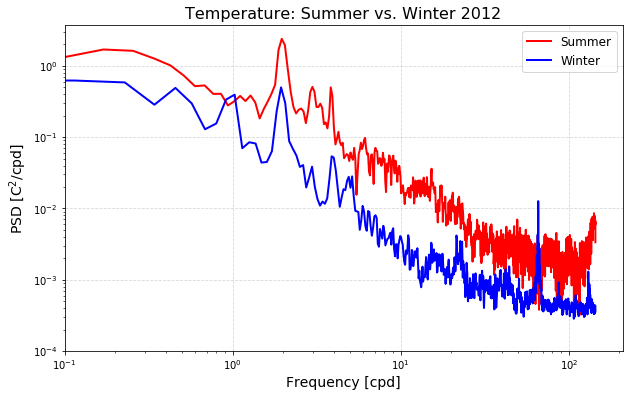

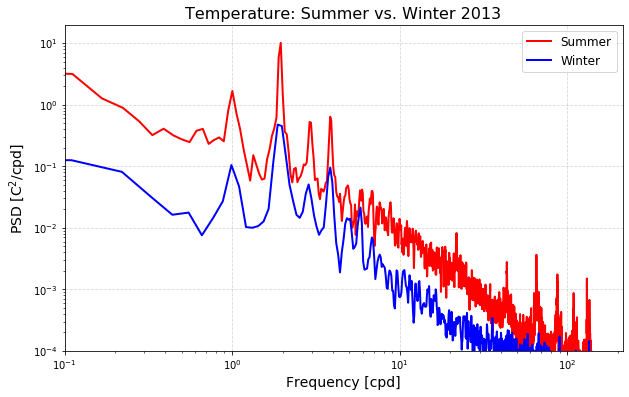

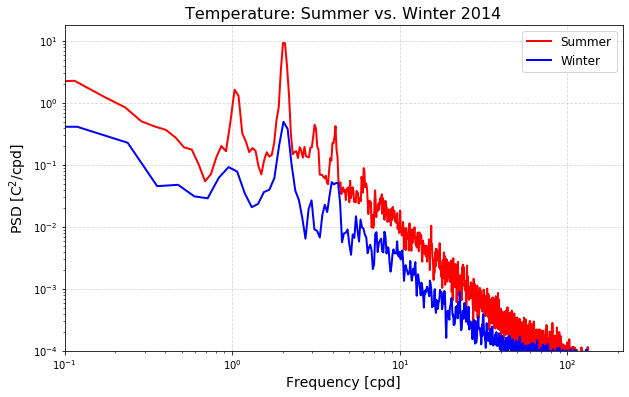

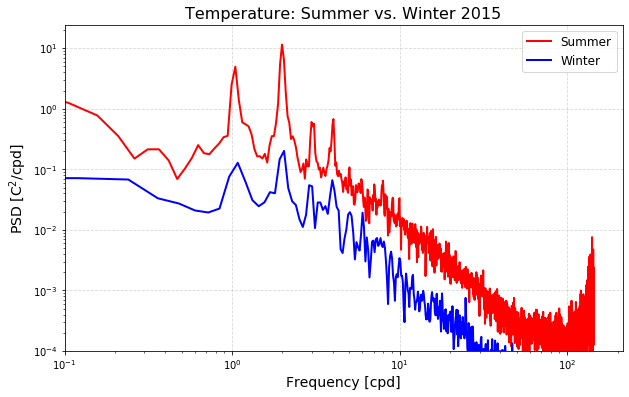

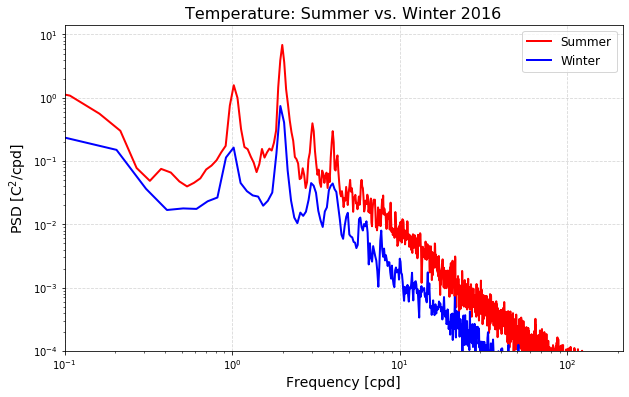

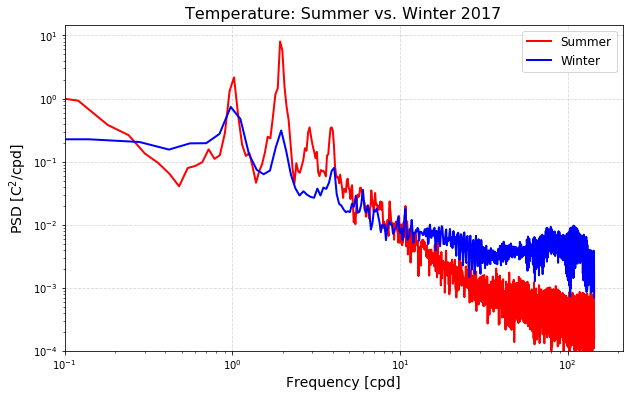

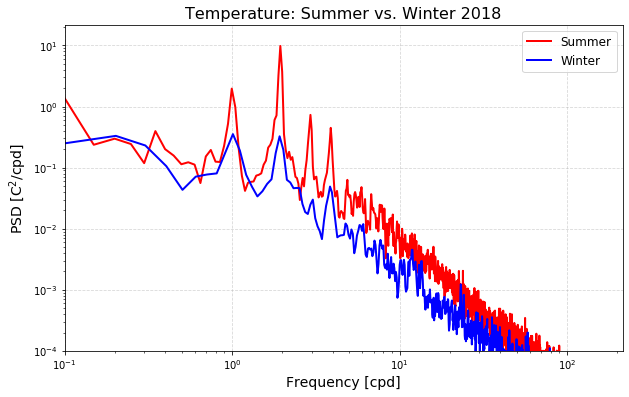

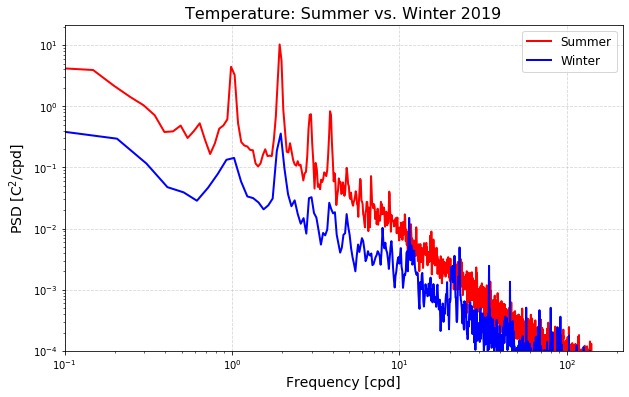

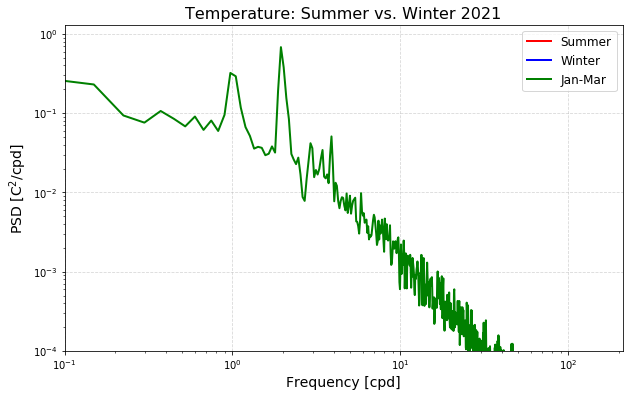

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from scipy.signal import welch

# Define the local dataset files for each year
local_datasets = {
    2010: 'moss_landing_2010.nc',
    2011: 'moss_landing_2011.nc',
    2012: 'moss_landing_2012.nc',
    2013: 'moss_landing_2013.nc',
    2014: 'moss_landing_2014.nc',
    2015: 'moss_landing_2015.nc',
    2016: 'moss_landing_2016.nc',
    2017: 'moss_landing_2017.nc',
    2018: 'moss_landing_2018.nc', 
    2019: 'moss_landing_2019.nc',
    2021: 'moss_landing_2021.nc'
}

# Define the date ranges for summer and winter
summer_start = '07-01'
summer_end = '10-31'
winter_start = '11-01'
winter_end = '02-28'

# Loop through each year
for year, dataset_file in local_datasets.items():
    # Load the dataset using xarray
    ds = xr.open_dataset(dataset_file)
    
    # Extract temperature data for summer and winter
    summer_data = ds['temp'].sel(time=slice(f"{year}-{summer_start}", f"{year}-{summer_end}"))
    winter_data = ds['temp'].sel(time=slice(f"{year}-{winter_start}", f"{year+1}-{winter_end}"))
    
    # Convert to pandas DataFrame for easier manipulation
    summer_data_df = summer_data.to_dataframe()
    winter_data_df = winter_data.to_dataframe()
    
    # Clean the data by removing NaNs and infs
    summer_data_df.dropna(inplace=True)
    summer_data_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    summer_data_df.dropna(inplace=True)
    winter_data_df.dropna(inplace=True)
    winter_data_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    winter_data_df.dropna(inplace=True)
    
    # Apply spectral analysis for summer
    N_summer = len(summer_data_df)
    winlen_summer = N_summer / 6
    f_summer, S_summer = welch(summer_data_df['temp'], fs=288, nperseg=winlen_summer, window='hanning', detrend='linear')
    
    # Apply spectral analysis for winter
    N_winter = len(winter_data_df)
    winlen_winter = N_winter / 6
    f_winter, S_winter = welch(winter_data_df['temp'], fs=288, nperseg=winlen_winter, window='hanning', detrend='linear')
    
    # Plot the results for summer and winter on the same plot
    plt.figure(figsize=(10, 6))  # Larger figure size
    plt.loglog(f_summer, S_summer, color='red', label='Summer', linewidth=2)  # Red line for summer with increased linewidth
    plt.loglog(f_winter, S_winter, color='blue', label='Winter', linewidth=2)  # Blue line for winter with increased linewidth
    
    # Label only January-March for 2021
    if year == 2021:
        jan_mar_data = ds['temp'].sel(time=slice('2021-01-01', '2021-03-31'))
        jan_mar_data_df = jan_mar_data.to_dataframe()
        jan_mar_data_df.dropna(inplace=True)
        jan_mar_data_df.replace([np.inf, -np.inf], np.nan, inplace=True)
        jan_mar_data_df.dropna(inplace=True)
        N_jan_mar = len(jan_mar_data_df)
        winlen_jan_mar = N_jan_mar / 6
        f_jan_mar, S_jan_mar = welch(jan_mar_data_df['temp'], fs=288, nperseg=winlen_jan_mar, window='hanning', detrend='linear')
        plt.loglog(f_jan_mar, S_jan_mar, color='green', label='Jan-Mar', linewidth=2)  # Green line for January-March with increased linewidth
    
    plt.title(f'Temperature: Summer vs. Winter {year}', fontsize=16)  # Larger title font size
    plt.xlabel('Frequency [cpd]', fontsize=14)  # Larger x-axis label font size
    plt.ylabel('PSD [C$^{2}$/cpd]', fontsize=14)  # Larger y-axis label font size
    plt.ylim(0.0001)
    plt.xlim(0.1)
    plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines with dashed style and transparency
    plt.legend(fontsize=12)  # Add legend with larger font size
    plt.show()  # Show plot for each year

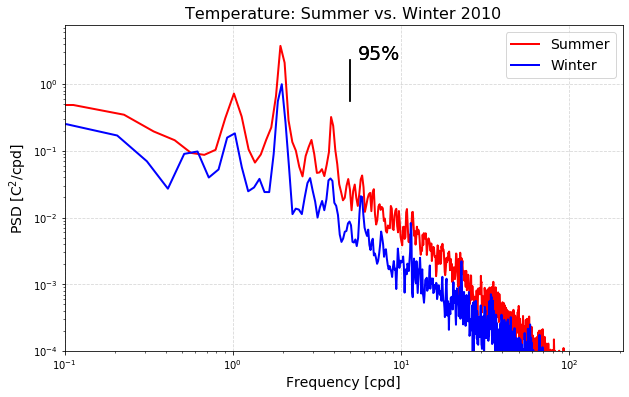

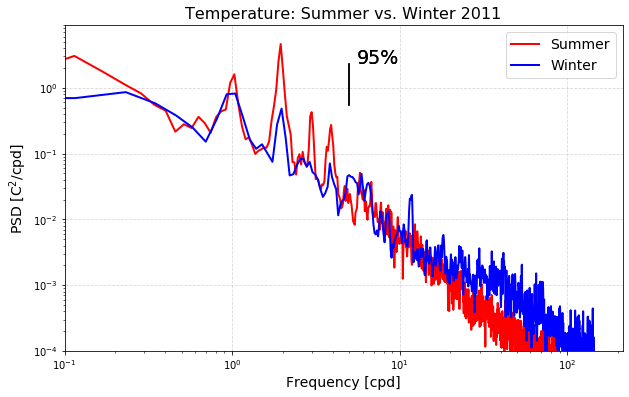

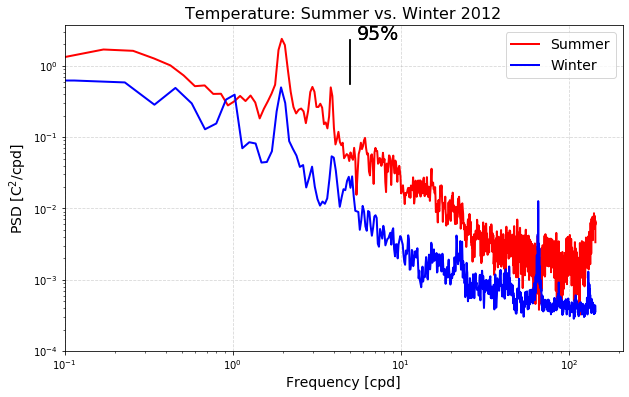

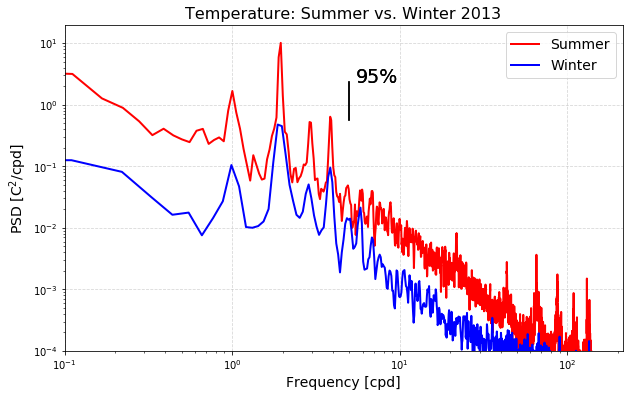

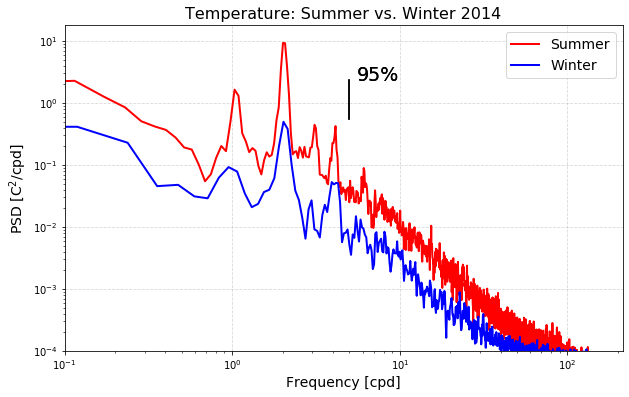

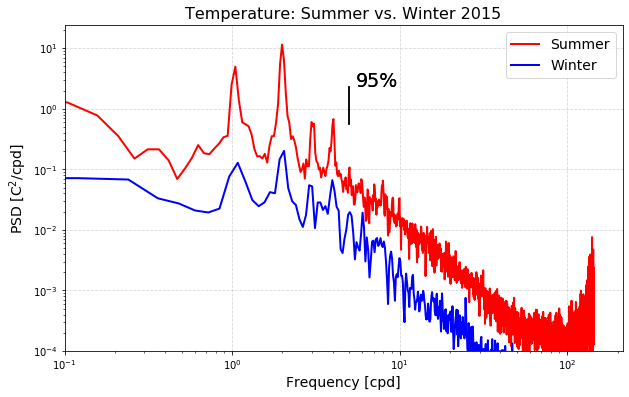

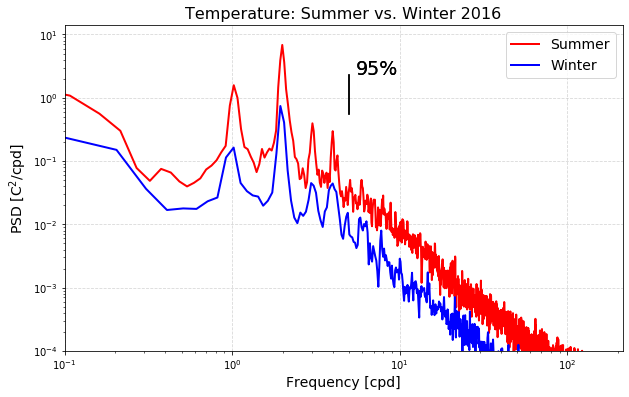

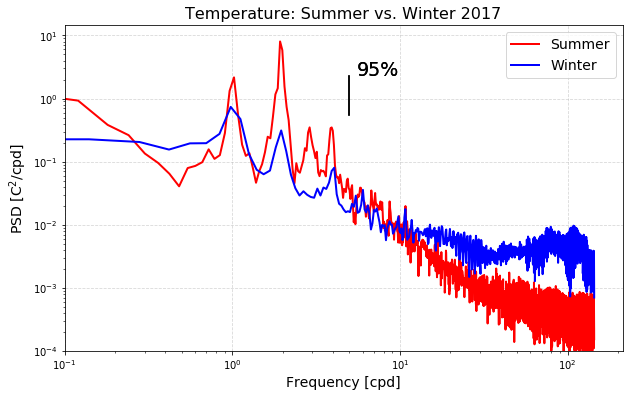

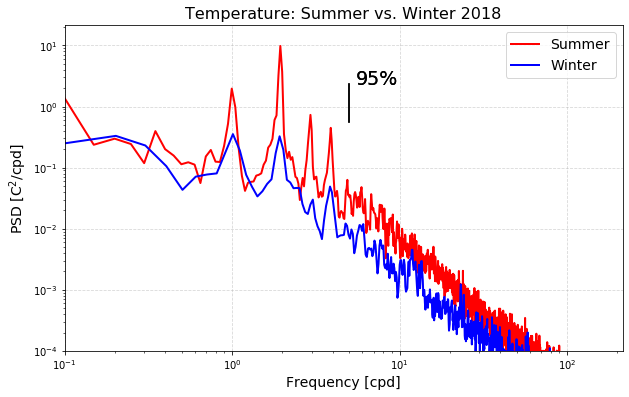

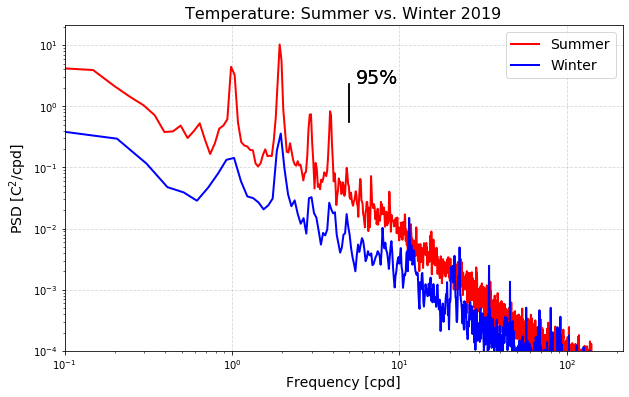

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy.signal import welch
from scipy.stats import chi2

# Define the local dataset files for each year
local_datasets = {
    2010: 'moss_landing_2010.nc',
    2011: 'moss_landing_2011.nc',
    2012: 'moss_landing_2012.nc',
    2013: 'moss_landing_2013.nc',
    2014: 'moss_landing_2014.nc',
    2015: 'moss_landing_2015.nc',
    2016: 'moss_landing_2016.nc',
    2017: 'moss_landing_2017.nc',
    2018: 'moss_landing_2018.nc', 
    2019: 'moss_landing_2019.nc',
}

# Define the date ranges for summer and winter
summer_start = '07-01'
summer_end = '10-31'
winter_start = '11-01'
winter_end = '02-28'

# Loop through each year
for year, dataset_file in local_datasets.items():
    # Load the dataset using xarray
    ds = xr.open_dataset(dataset_file)
    
    # Extract temperature data for summer and winter
    summer_data = ds['temp'].sel(time=slice(f"{year}-{summer_start}", f"{year}-{summer_end}"))
    winter_data = ds['temp'].sel(time=slice(f"{year}-{winter_start}", f"{year+1}-{winter_end}"))
    
    # Convert to pandas DataFrame for easier manipulation
    summer_data_df = summer_data.to_dataframe()
    winter_data_df = winter_data.to_dataframe()
    
    # Clean the data by removing NaNs and infs
    summer_data_df.dropna(inplace=True)
    summer_data_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    summer_data_df.dropna(inplace=True)
    winter_data_df.dropna(inplace=True)
    winter_data_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    winter_data_df.dropna(inplace=True)
    
    # Apply spectral analysis for summer
    N_summer = len(summer_data_df)
    winlen_summer = N_summer / 6
    f_summer, S_summer = welch(summer_data_df['temp'], fs=288, nperseg=winlen_summer, window='hanning', detrend='linear')
    
    # Apply spectral analysis for winter
    N_winter = len(winter_data_df)
    winlen_winter = N_winter / 6
    f_winter, S_winter = welch(winter_data_df['temp'], fs=288, nperseg=winlen_winter, window='hanning', detrend='linear')
    
    # Calculate confidence intervals for summer
    edof_summer = (8/3) * (N_summer / winlen_summer)  # Effective degrees of freedom
    lower_summer = edof_summer / chi2.ppf(0.975, edof_summer)
    upper_summer = edof_summer / chi2.ppf(0.025, edof_summer)
    
    # Calculate confidence intervals for winter
    edof_winter = (8/3) * (N_winter / winlen_winter)  # Effective degrees of freedom
    lower_winter = edof_winter / chi2.ppf(0.975, edof_winter)
    upper_winter = edof_winter / chi2.ppf(0.025, edof_winter)
    
    # Plot the results for summer and winter on the same plot
    plt.figure(figsize=(10, 6))  # Larger figure size
    plt.loglog(f_summer, S_summer, color='red', label='Summer', linewidth=2)  # Orange line for summer with increased linewidth
    plt.loglog(f_winter, S_winter, color='blue', label='Winter', linewidth=2)  # Blue line for winter with increased linewidth
    
    # Plot confidence intervals for summer and winter
    plt.plot([5, 5], np.array([lower_summer, upper_summer]), '-k')  # Black error bar line for summer
    plt.plot([5, 5], np.array([lower_winter, upper_winter]), '-k')  # Black error bar line for winter
    
    # Add the '95%' text next to the error bar line
    plt.text(5.5, upper_summer, '95%', fontsize=19, color='black')
    plt.text(5.5, upper_winter, '95%', fontsize=19, color='black')
    
    plt.title(f'Temperature: Summer vs. Winter {year}', fontsize=16)  # Larger title font size
    plt.xlabel('Frequency [cpd]', fontsize=14)  # Larger x-axis label font size
    plt.ylabel('PSD [C$^{2}$/cpd]', fontsize=14)  # Larger y-axis label font size
    plt.ylim(0.0001)
    plt.xlim(0.1)
    plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines with dashed style and transparency
    plt.legend(fontsize=14)  # Add legend with larger font size
    plt.show()  # Show plot for each year


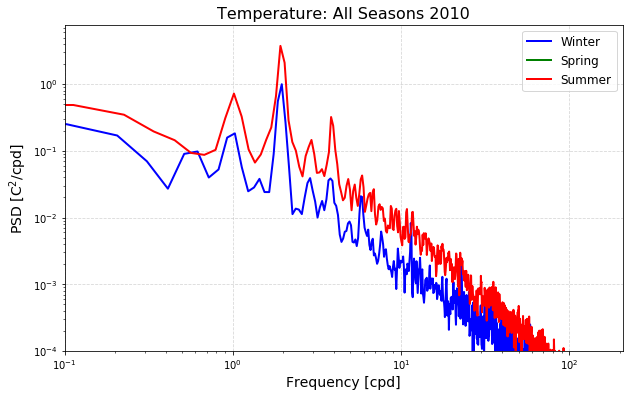

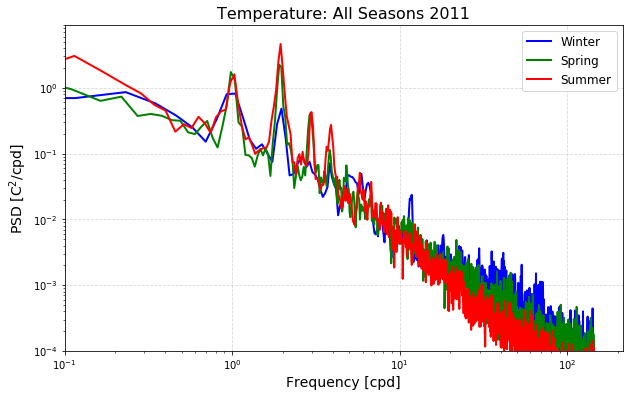

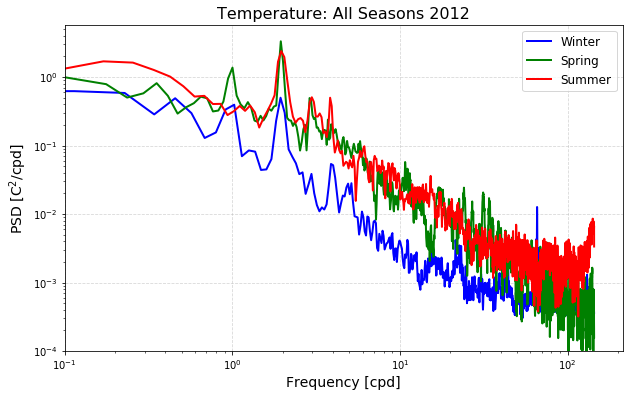

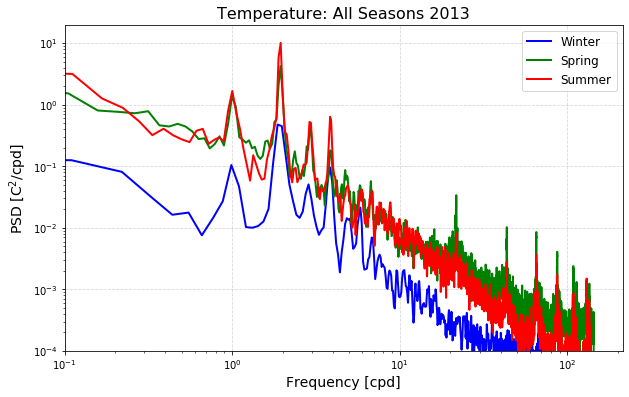

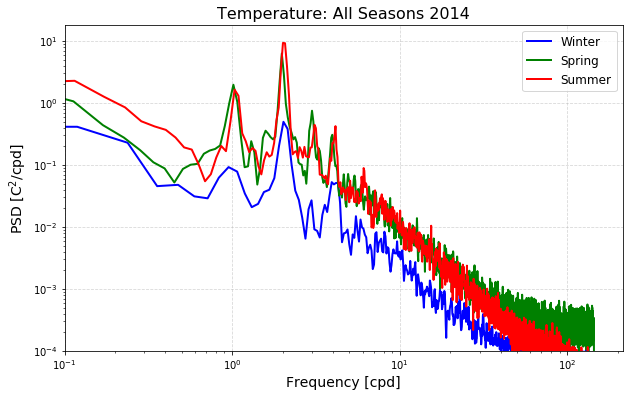

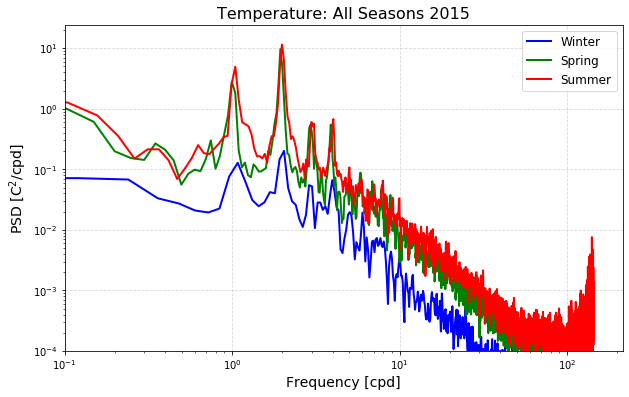

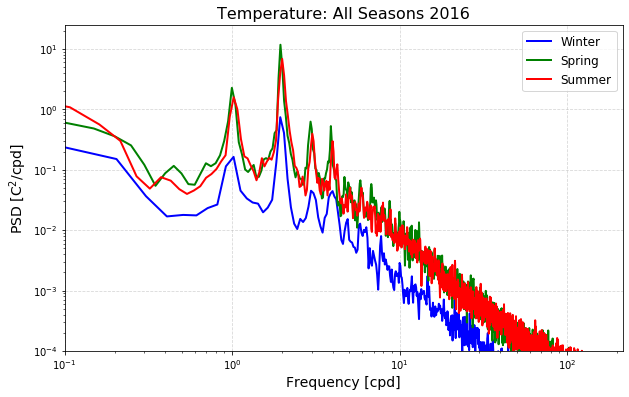

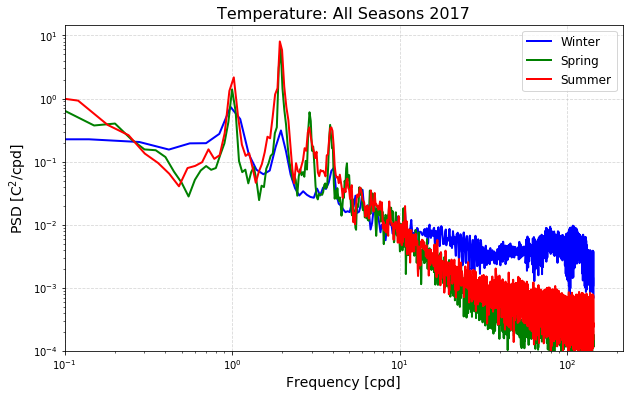

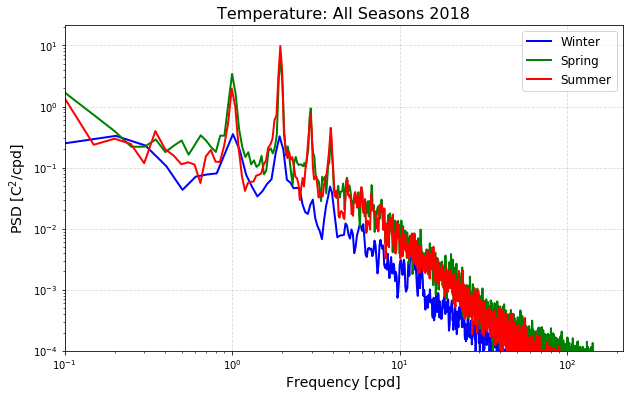

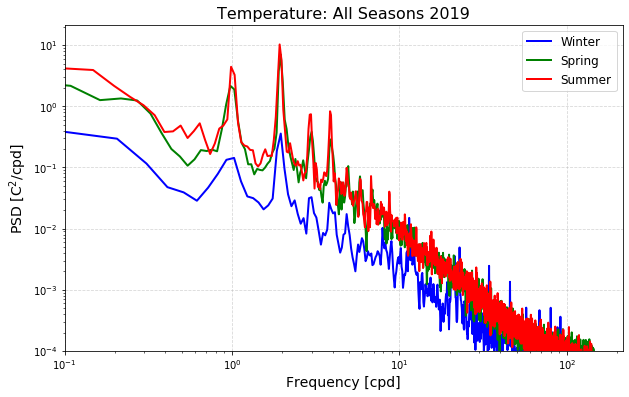

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from scipy.signal import welch

# Define the local dataset files for each year
local_datasets = {
    2010: 'moss_landing_2010.nc',
    2011: 'moss_landing_2011.nc',
    2012: 'moss_landing_2012.nc',
    2013: 'moss_landing_2013.nc',
    2014: 'moss_landing_2014.nc',
    2015: 'moss_landing_2015.nc',
    2016: 'moss_landing_2016.nc',
    2017: 'moss_landing_2017.nc',
    2018: 'moss_landing_2018.nc',
    2019: 'moss_landing_2019.nc'
}

# Define the date ranges for each season
seasons = {
    'Spring': ('03-01', '06-30'),
    'Summer': ('07-01', '10-31'),
    'Winter': ('11-01', '12-31')  # Adjusted end date for winter in 2019
}

# Loop through each year
for year, dataset_file in local_datasets.items():
    # Load the dataset using xarray
    ds = xr.open_dataset(dataset_file)
    
    # Initialize lists to store frequency and power spectral density (PSD) for each season
    f_seasons = []
    S_seasons = []
    
    # Perform spectral analysis for each season
    for season, (start_date, end_date) in seasons.items():
        start_date = f"{year}-{start_date}"
        end_date = f"{year}-{end_date}"  # Adjusted end date for winter in 2019
        
        # Extract temperature data for the current season
        seasonal_data = ds['temp'].sel(time=slice(start_date, end_date))
        
        # Convert to pandas DataFrame for easier manipulation
        seasonal_data_df = seasonal_data.to_dataframe()
        
        # Clean the data by removing NaNs and infs
        seasonal_data_df.dropna(inplace=True)
        seasonal_data_df.replace([np.inf, -np.inf], np.nan, inplace=True)
        seasonal_data_df.dropna(inplace=True)
        
        # Apply spectral analysis
        N = len(seasonal_data_df)
        winlen = N / 6
        f, S = welch(seasonal_data_df['temp'], fs=288, nperseg=winlen, window='hanning', detrend='linear')
        
        # Append frequency and PSD to the lists
        f_seasons.append(f)
        S_seasons.append(S)
        
    # Plot the results for all seasons on the same graph
    plt.figure(figsize=(10, 6))  # Larger figure size
    
    # Plot winter
    plt.loglog(f_seasons[2], S_seasons[2], color='blue', label='Winter', linewidth=2)
    
    # Plot spring
    plt.loglog(f_seasons[0], S_seasons[0], color='green', label='Spring', linewidth=2)
    
    # Plot summer
    plt.loglog(f_seasons[1], S_seasons[1], color='red', label='Summer', linewidth=2)
    
    plt.title(f'Temperature: All Seasons {year}', fontsize=16)  # Larger title font size
    plt.xlabel('Frequency [cpd]', fontsize=14)  # Larger x-axis label font size
    plt.ylabel('PSD [C$^{2}$/cpd]', fontsize=14)  # Larger y-axis label font size
    plt.ylim(0.0001)
    plt.xlim(0.1)
    plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines with dashed style and transparency
    plt.legend(fontsize=12)  # Add legend with larger font size
    plt.show()  # Show plot for each year
